#  The data (sample) were collected in São Paulo — Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age(average). The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption basedon the features that contain climate conditions.

In [59]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [60]:
# 1. Load the dataset and check its shape
df = pd.read_csv('C:/Users/Kalpesh__K__/Downloads/assignment_4 dataset_eel_8ssk692/Assignment 4 Dataset/Consumo_cerveja.csv')
print(df.shape)


(941, 7)


In [61]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [62]:
# 2. Rectify the data of the first four columns
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',', '.').astype(float)
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',', '.').astype(float)
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',', '.').astype(float)
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',', '.').astype(float)


In [71]:
# Create new features using the 'Data' feature and make the 'Data' column the index
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df['Month'] = df['Data'].dt.month
df['Day'] = df['Data'].dt.day_name

df.set_index('Data', inplace=True)


In [72]:
# 4. Handle null and duplicate values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [73]:
# 5. Check the data type of the features and convert them to the appropriate data type
df['Month'] = df['Month'].astype('category')
df['Day'] = df['Day'].astype('category')


<AxesSubplot:xlabel='Consumo de cerveja (litros)'>

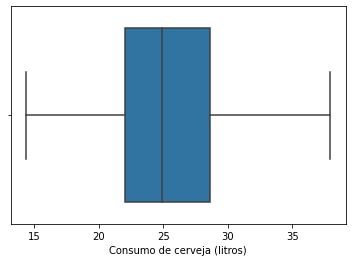

In [74]:
# 6. Analyze features with outlier values
sns.boxplot(x=df['Consumo de cerveja (litros)'])


<AxesSubplot:>

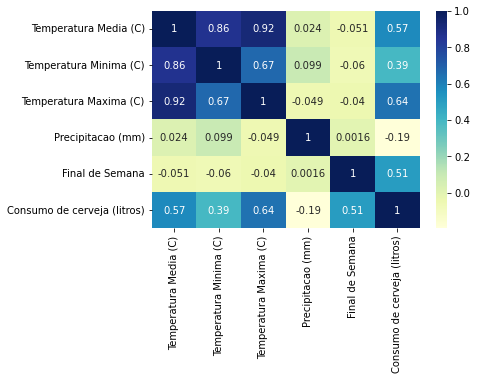

In [75]:
# 7. Plot and analyze the correlation
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


In [80]:
# 8. Split the dataset for training and testing
X = df.drop(['Consumo de cerveja (litros)'], axis=1)
y = df['Consumo de cerveja (litros)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# 8. Split the dataset for training and testing
X = df.drop('Consumo de cerveja (litros)', axis=1)
y = df['Consumo de cerveja (litros)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [78]:
# 9. Train a linear regression model and print the intercept and coefficients
model = LinearRegression()
model.fit(X_train, y_train)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


TypeError: float() argument must be a string or a number, not 'method'

In [79]:
# 10. Evaluate the model using the R2 score, mean absolute error, and root mean squared error
y_pred = model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


TypeError: float() argument must be a string or a number, not 'method'

# 1Problem Statement 2:You are provided with the California housing dataset. Based on the given parameters of a house, predict its price.

Write a Python code to perform the following tasks mentioned:1.Load the data, check its shape and check for null values 2.Split the dataset for training and testing -1000 instances for testing3.Train the model using sklearn (Apply linear regression to train a model for prediction)4.Predict the prices on test data and evaluate the modelby r2 score and mean absolute error5.Find coefficient and intercept using the trained model

In [19]:
import pandas as pd

medical_data = pd.read_csv('C:/Users/Kalpesh__K__/Downloads/assignment_4 dataset_eel_8ssk692/Assignment 4 Dataset/california_housing_train.csv')
print(medical_data.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [20]:
print(medical_data.shape)


(17000, 9)


In [21]:
print(medical_data.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [24]:
# Step 2: Split the dataset for training and testing - 1000 instances for testing
X_train=medical_data.iloc[:-1000,:-1]
y_train=medical_data.iloc[:-1000,:-1]
X_test=medical_data.iloc[:-1000,:-1]
y_test=medical_data.iloc[:-1000,:-1]
print('shape of x_train is: ',X_train.shape)
print('shape of y_train is: ',y_train.shape)
print('shape of x_test is: ',X_test.shape)
print('shape of y_test is: ',y_test.shape)


shape of x_train is:  (16000, 8)
shape of y_train is:  (16000, 8)
shape of x_test is:  (16000, 8)
shape of y_test is:  (16000, 8)


In [25]:
# Step 3: Train the model using sklearn (Apply linear regression to train a model for prediction)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [26]:
# Step 4: Predict the charges on test data and evaluate the model by r2 score and mean absolute error
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
 

R2 score: 1.0
Mean absolute error: 7.133661625823018e-13


In [27]:
# Step 5: Find coefficient and intercept using the trained model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)




Coefficients: [[ 1.00000000e+00  4.91312876e-16  1.06312465e-15  7.89945761e-18
  -2.91207341e-17 -1.09156795e-17  2.57092842e-18  1.13218989e-16]
 [ 8.82954743e-15  1.00000000e+00 -5.89045874e-15 -1.66273125e-16
   3.31396849e-17  1.73691595e-16  5.93308126e-17  9.24473390e-17]
 [ 9.87140701e-15  7.01056905e-15  1.00000000e+00 -1.16821850e-18
   4.07525726e-16 -4.57507089e-17 -3.93431659e-16  6.33019253e-17]
 [-1.16074829e-13 -1.30410548e-13  5.93155933e-14  1.00000000e+00
  -4.66781973e-16 -1.05828860e-15 -3.48517454e-16 -8.41261826e-15]
 [-5.17625707e-14 -6.13184073e-14 -8.59704596e-15 -2.22630086e-15
   1.00000000e+00  3.85381852e-15  1.37520857e-15  1.22682040e-15]
 [-8.88933853e-14 -9.24029512e-14 -3.58255878e-14 -5.50067976e-16
   8.13285589e-16  1.00000000e+00 -6.43893808e-16  3.23639740e-15]
 [-5.75519551e-14 -5.65100129e-14 -2.36482091e-15 -2.12822007e-15
   8.98108182e-16  3.37044335e-15  1.00000000e+00  7.20642767e-16]
 [ 7.39801668e-16  6.04472447e-16  1.62428158e-16  1.54

# modelProblem Statement 3:You are provided with the medical cost dataset. You need to predict individual medical costs billed by health insurance.

Write a Python code to perform the following tasks mentioned:1.Load the data, check its shape and check for null values 2.Convert categorical featuresto numerical values (Use One-Hot Encoding)3.Split the dataset for training and testing  4.Train the model using sklearn –Linear Regression5.Find the intercept and coefficient from the trained model 6.Predict the prices of test data and evaluate the model using calculatedr2 score and root mean squared error

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [32]:
# Load the data
data = pd.read_csv('C:Users/Kalpesh__K__/Downloads/assignment_4 dataset_eel_8ssk692/Assignment 4 Dataset/insurance.csv')


In [33]:
# Check the shape of the data
print("Shape of the data:", data.shape)


Shape of the data: (1338, 7)


In [34]:
# Check for null values
print("Null values in the data:\n", data.isnull().sum())


Null values in the data:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [41]:
# Convert categorical features to numerical values using one-hot encoding
cat_features = ['sex', 'smoker', 'region']
encoder = OneHotEncoder()
cat_encoded = encoder.fit_transform(data[cat_features])


In [42]:
# Combine numerical and categorical features
num_features = ['age', 'bmi', 'children']
X = pd.concat([data[num_features], pd.DataFrame(cat_encoded.toarray())], axis=1)


In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['charges'], test_size=0.2, random_state=42)


In [46]:

model = LinearRegression()
model.fit(X_train, y_train)
# Train the model using linear regression
model = LinearRegression()
model.fit(X_train, y_train)


C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [47]:
# Find the intercept and coefficients from the trained model
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X_train.columns, model.coef_)))


Intercept: -574.5357125101764
Coefficients: {'age': 256.9757058311943, 'bmi': 337.0925519487754, 'children': 425.2787835242785, 0: 9.295845820505534, 1: -9.295845820510035, 2: -11825.564427880608, 3: 11825.564427880608, 4: 459.5852442437299, 5: 88.9079180159262, 6: -198.27905232091405, 7: -350.21410993874076}


In [48]:
# Predict the prices of test data and evaluate the model
y_pred = model.predict(X_test)
print("R2 score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))

R2 score: 0.7835929767120723
Root Mean Squared Error: 5796.2846592762735


C:\Users\Kalpesh__K__\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Problem Statement 4: You are provided with the '50_Startups' data. Using the given features, you must predict the profit of these startups.

companyWrite a Python code to perform the following tasks mentioned:1.Load the data, check its shape and check for null values2.Convert categorical features to numerical values using Label Encoder3.Split the dataset for training and testing 4.Train the model using sklearn(linear regression), also find the intercept and coefficient from the trained model 5.Predict the profits of test data and evaluate the model using r2 score and mean squared error6.Regularize the model using Ridge Regression and find the Score 7.Regularize the model using LassoRegression and find the Score

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


In [50]:
# Load the data
startup_data = pd.read_csv('C:/Users/Kalpesh__K__/Downloads/assignment_4 dataset_eel_8ssk692/Assignment 4 Dataset/50_Startups.csv')


In [51]:
# Check for null values and shape of data
print(startup_data.isnull().sum())
print(startup_data.shape)


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
(50, 5)


In [52]:
# Convert categorical features to numerical values
label_encoder = LabelEncoder()
startup_data['State'] = label_encoder.fit_transform(startup_data['State'])


In [53]:
# Split the dataset into training and testing sets
X = startup_data.iloc[:, :-1].values
y = startup_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [54]:
# Train the model using linear regression and find the intercept and coefficient
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)


Intercept: 42658.087123248944
Coefficients: [7.77203690e-01 3.02432445e-02 3.49236072e-02 3.15877202e+02]


In [55]:
# Predict the profits of test data and evaluate the model using r2 score and mean squared error
y_pred = regressor.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9386861070938135
Mean Squared Error: 78413822.17201321


In [56]:
# Regularize the model using Ridge Regression and find the score
ridge_regressor = Ridge(alpha=0.1)
ridge_regressor.fit(X_train, y_train)
y_pred_ridge = ridge_regressor.predict(X_test)
print("Ridge Regression Score:", ridge_regressor.score(X_test, y_test))


Ridge Regression Score: 0.9386887176634789


In [58]:
# Regularize the model using Lasso Regression and find the score
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train, y_train)
y_pred_lasso = lasso_regressor.predict(X_test)
print("Lasso Regression Score:", lasso_regressor.score(X_test, y_test))

Lasso Regression Score: 0.9386864389509967
